# Image Edit

https://platform.openai.com/docs/guides/image-generation?image-generation-model=gpt-image-1

In [1]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

!pip install openai
!pip install gradio

# Clean up the notebook
clean_notebook()

Notebook cleaned.


In [2]:
import os
from openai import OpenAI
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

True

# Image Edit I

In [3]:
from openai import OpenAI
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt


def encode_image(image_path):
    """Helper function to encode image to base64"""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')
    

client = OpenAI()


# Test Prompt 1

In [4]:

prompt = """Generate a image of a room on a white background 
labeled 'วิชาสร้างภาพ AI4BA' with a ribbon and handwriting-like font, 
containing all the items in the reference pictures."""

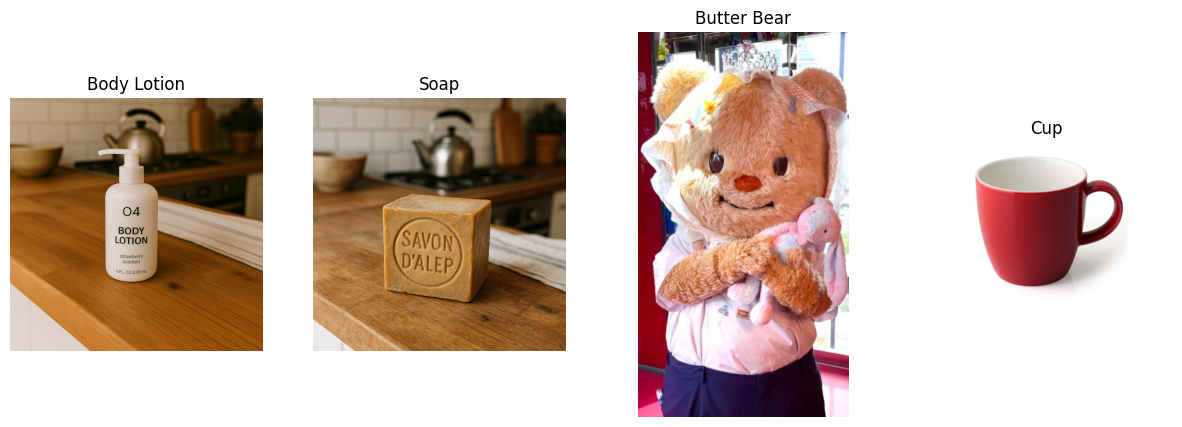

In [14]:


base64_image1 = encode_image("body-lotion.png")
base64_image2 = encode_image("soap.png")
base64_image3 = encode_image("butter_bear.png")
base64_image4 = encode_image("cup01.png")



# List of image paths and titles
images_info = [
    ("body-lotion.png", "Body Lotion"),
    ("soap.png", "Soap"),
    ("butter_bear.png", "Butter Bear"),
    ("cup01.png", "Cup")
]

# Encode images and load them for display
encoded_images = []
loaded_images = []

for img_path, _ in images_info:
    encoded_images.append(encode_image(img_path))
    loaded_images.append(Image.open(img_path))

# Plot the images (only showing 3 as in your original code)
plt.figure(figsize=(15, 5))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(loaded_images[i])
    plt.axis('off')
    plt.title(images_info[i][1])

plt.show()

In [15]:

response = client.responses.create(
    model="gpt-4.1",
    input=[
        {
            "role": "user",
            "content": [
                {"type": "input_text", "text": prompt},
                {
                    "type": "input_image",
                    "image_url": f"data:image/jpeg;base64,{base64_image1}",
                },
                {
                    "type": "input_image",
                    "image_url": f"data:image/jpeg;base64,{base64_image2}",
                },
                {
                    "type": "input_image",
                    "image_url": f"data:image/jpeg;base64,{base64_image3}",
                },
 {
                    "type": "input_image",
                    "image_url": f"data:image/jpeg;base64,{base64_image4}",
                },
            
             
            ],
        }
    ],
    tools=[{"type": "image_generation"}],
)

image_generation_calls = [
    output
    for output in response.output
    if output.type == "image_generation_call"
]

image_data = [output.result for output in image_generation_calls]

if image_data:
    image_base64 = image_data[0]
    # Save the image to a file
    with open("gift-basket.png", "wb") as f:
        f.write(base64.b64decode(image_base64)) 
else:
    print(response.output.content)

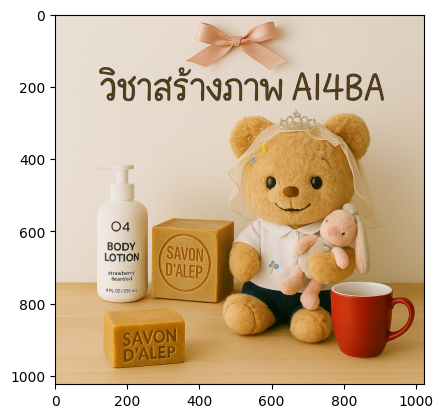

In [16]:
from PIL import Image
from io import BytesIO
import base64
import matplotlib.pyplot as plt

image_bytes = base64.b64decode(image_base64)
image = Image.open(BytesIO(image_bytes))
plt.imshow(image)     

# Image Edit 2 :  Edit an image using a mask (inpainting)

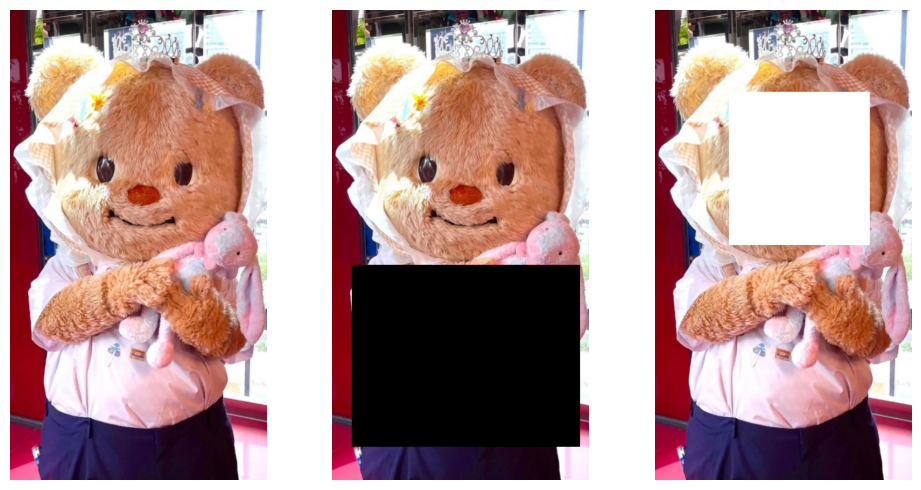

In [12]:
import matplotlib.pyplot as plt
from PIL import Image

# List of image paths
image_paths = [ "./butter_bear.png","./mark_butter_bear01.png","./mark_butter_bear02.png"]

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 3, figsize=(10, 5))  # You can adjust figsize as needed

# Loop over image paths and axes
for ax, path in zip(axes, image_paths):
    image = Image.open(path)
    ax.imshow(image)
    ax.axis('off')  # Hide axis

# Display the images
plt.tight_layout()
plt.show()

(np.float64(-0.5), np.float64(1023.5), np.float64(1535.5), np.float64(-0.5))

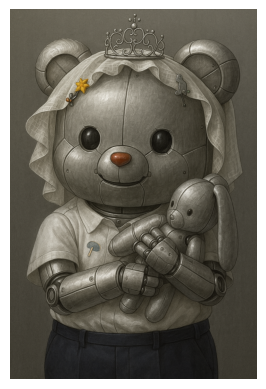

In [10]:
from openai import OpenAI
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

client = OpenAI()

result = client.images.edit(
    model="gpt-image-1",
    image=open("butter_bear.png", "rb"),
    mask=open("mark_butter_bear01.png", "rb"),
    prompt="sliver robot in marked area",
)

image_base64 = result.data[0].b64_json
image_bytes = base64.b64decode(image_base64)

image = Image.open(BytesIO(image_bytes))
plt.imshow(image)
plt.axis('off')


(np.float64(-0.5), np.float64(1023.5), np.float64(1535.5), np.float64(-0.5))

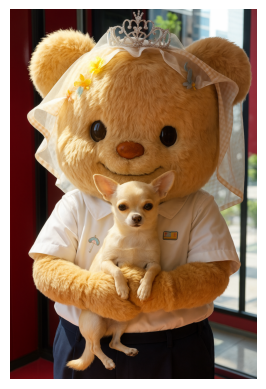

In [13]:
from openai import OpenAI
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

client = OpenAI()

result = client.images.edit(
    model="gpt-image-1",
    image=open("butter_bear.png", "rb"),
    mask=open("mark_butter_bear02.png", "rb"),
    prompt="small dog in area",
)

image_base64 = result.data[0].b64_json
image_bytes = base64.b64decode(image_base64)

image = Image.open(BytesIO(image_bytes))
plt.imshow(image)
plt.axis('off')
